In [131]:
import pandas as pd
import numpy as np

In [3]:
df_nr = pd.read_csv(
            "nr_pdb_filtered.blast.tsv", 
            sep="\t", 
            names=("qid", "tid", "pidentity", "aln_len", "mismatches", "qlen", "tlen", "perc_q_cov_per_hsp", "evalue", "bitscore"),
            comment="#"
        )

In [4]:
df_nr = df_nr[df_nr.qid!=df_nr.tid]

In [5]:
qlen = df_nr['qlen'].values
tlen = df_nr['tlen'].values
qt_len_pairs = np.vstack((qlen, tlen)).transpose()

In [6]:
len_cov = np.array([min(x)/max(x) for x in qt_len_pairs])

In [7]:
MIN_LEN_COV = 0.75
MIN_PID = 50

df_hi_pid = df_nr[(len_cov>MIN_LEN_COV) & (df_nr.pidentity>MIN_PID)]

In [8]:
df_hi_pid.head()

qid      tid  pidentity  aln_len  mismatches  qlen  tlen  \
1  4v7h_BF  3j6x_L7     86.735      196          26   213   244   
2  4v7h_BF  5ndv_L7     86.735      196          26   213   226   
3  4v7h_BF  4u3m_L7     86.735      196          26   213   243   
4  4v7h_BF  5i4l_L7     86.735      196          26   213   223   
5  4v7h_BF  5m1j_F5     86.735      196          26   213   222   

   perc_q_cov_per_hsp         evalue  bitscore  
1                  92  3.430000e-125     354.0  
2                  92  4.430000e-125     353.0  
3                  92  5.360000e-125     353.0  
4                  92  7.770000e-125     352.0  
5                  92  9.450000e-125     352.0

In [117]:
q_pdb = [x.split("_")[0] for x in df_hi_pid.qid.values]
t_pdb = [x.split("_")[0] for x in df_hi_pid.tid.values]

In [134]:
#pdb_pairs = set([x for x in zip(q_pdb, t_pdb)])
pdb_pairs = list(set([x if x[0]<x[1] else (x[1], x[0]) for x in zip(q_pdb, t_pdb)]))
pdb_pairs = sorted(pdb_pairs)

In [135]:
len(pdb_pairs)

1963911

In [137]:
pdb_pairs[:10]

[('101m', '102m'),
 ('101m', '104m'),
 ('101m', '106m'),
 ('101m', '109m'),
 ('101m', '1a6g'),
 ('101m', '1a6k'),
 ('101m', '1azi'),
 ('101m', '1bje'),
 ('101m', '1ch1'),
 ('101m', '1ch2')]

In [139]:
with open("PDB_PAIRS.TSV", "w+") as f:
    for p in pdb_pairs:
        f.write("{}\t{}\n".format(p[0], p[1]))

In [ ]:
!cat PDB_PAIRS.TSV | tr "\t" "\n" | sort | uniq | awk '{print "https://files.rcsb.org/download/"$1".cif"}' > PDB_FILES.TXT

# -------

In [101]:
for i, row in df_nr.iterrows():
    #print(row)
    qid = row.qid
    tid = row.tid
    symm_row = df_nr[(df_nr.qid==tid) & (df_nr.tid==qid)]
    #print(symm_row)
    break

# ------

In [31]:
df = pd.read_csv("./pdb/3j6x-4v7h.cut.txt", sep="\t")

In [37]:
np.all(df.PDBchain2 == df.PDBchain1r)

True

In [61]:
CUTOFF=0.59
dffilt = df[(df.TM1>CUTOFF) | (df.TM2>CUTOFF) | (df.TM1r>CUTOFF) | (df.TM2r>CUTOFF)]

In [62]:
dffilt.head()

PDBchain1      PDBchain2     TM1     TM2  RMSD     PDBchain1r  \
61   3j6x.cif:1:11  4v7h.cif:1:AQ  0.4548  0.8055  1.80  4v7h.cif:1:AQ   
115  3j6x.cif:1:12  4v7h.cif:1:B2  0.6532  0.7958  2.20  4v7h.cif:1:B2   
124  3j6x.cif:1:12  4v7h.cif:1:BG  0.6308  0.6782  2.59  4v7h.cif:1:BG   
200  3j6x.cif:1:14  4v7h.cif:1:AK  0.7084  0.7180  2.62  4v7h.cif:1:AK   
255  3j6x.cif:1:15  4v7h.cif:1:AS  0.4352  0.6520  2.69  4v7h.cif:1:AS   

        PDBchain2r    TM1r    TM2r  RMSDr  
61   3j6x.cif:1:11  0.8055  0.4548   1.80  
115  3j6x.cif:1:12  0.7958  0.6532   2.20  
124  3j6x.cif:1:12  0.6782  0.6308   2.59  
200  3j6x.cif:1:14  0.7180  0.7084   2.62  
255  3j6x.cif:1:15  0.6520  0.4352   2.69

In [63]:
dffilt[dffilt.RMSD-dffilt.RMSDr!=0]

PDBchain1      PDBchain2     TM1     TM2  RMSD     PDBchain1r  \
2840  3j6x.cif:1:L5  4v7h.cif:1:AK  0.2764  0.5915  3.01  4v7h.cif:1:AK   

         PDBchain2r    TM1r    TM2r  RMSDr  
2840  3j6x.cif:1:L5  0.2841  0.2841    0.0

In [10]:
df0 = pd.read_pickle("../blast/data/DF_SAMPLED_PROTEINS_PIDS.pkl.gz")

In [11]:
df0.head()

queryid    targetid  pidentity  length  mismatch  qlen  tlen  \
0  2545910670  2545910670     100.00     117         0   117   117   
1  2580177991  2580177991     100.00      47         0    47    47   
2   651263332   651263332     100.00      90         0    90    90   
3   651263332   651263319      97.75      90         2    90   136   
4   651263332   651263412      97.75      90         2    90   136   

         evalue    bitscore  distance  \
0  2.060000e-84  240.000000  0.000000   
1  1.890000e-28   93.599998  0.000000   
2  1.920000e-63  185.000000  0.000000   
3  3.320000e-62  183.000000  0.022461   
4  3.360000e-62  183.000000  0.022461   

                                                qseq  \
0  MSVNKNNLSDIADYHEKIKFFEELFNLDYNPTEMLVTVERNGNVIY...   
1    ATRAIARASQRFVYGDYRIVELMGRRSATRDLTPELAAEVVLRSSSW   
2  MLPREFSSGGKQRLGRISKRGERYFRYLLVHGARAVAAVIERHKDN...   
3  MLPREFSSGGKQRLGRISKRGERYFRYLLVHGARAVAAVIERHKDN...   
4  MLPREFSSGGKQRLGRISKRGERYFRYLLVHGARAVAAVIERHKDN...   

                                                tseq  
0  MSVNKNNLSDIADYHEKIKFFEELFNLDYNPTEMLVTVERNGNVIY...  
1    ATRAIARASQRFVYGDYRIVELMGRRSATRDLTPELAAEVVLRSSSW  
2  MLPREFSSGGKQRLGRISKRGERYFRYLLVHGARAVAAVIERHKDN...  
3  MGKNTTRCQRVMKVPGVGLMTATYFVASVGNGQQFHSAKQFAAWLG...  
4  MGKTQPACQRVMKVPGVGLMTATYFVASVGNGQQFHSAKQFAAWLG...

###############

# backup

In [ ]:
ordered_pair_filter = [
    (qlen < tlen) | ((qlen == tlen) & (qid < tid))
    for qlen, tlen, qid, tid in df_scores[["qlen", "tlen", "qid", "tid"]].values
]

df_scores["ordered_pair"] = ordered_pair_filter

len_ordered = np.sum(ordered_pair_filter)
len_df = len(df_scores)

print("{:,} pairs out of {:,} are ordered.".format(len_ordered, len_df))
print("(2 x Ordered) - Total = {:,}".format(2 * len_ordered - len_df))
print("Keeping only ordered pairs. [Include singletons in the future]")

df_scores = df_scores[df_scores.ordered_pair == True]

# Backup from viz_training_holdouts: Load config and scores df

In [2]:
config_file = "config.json"
with open(config_file, "r") as f:
    p = json.load(f)

In [3]:
df_scores_full = pd.read_pickle("SCORES.pkl.gz")

## Mark one of the symmetric-duplicate entries (A,B) (B,A)

In [4]:
duplicate_filter = [(qlen>tlen) | \
                    ((qlen==tlen) & (qid>tid)) \
                    for qlen, tlen, qid, tid in \
                    df_scores_full[['qlen', 'tlen', 'qid', 'tid']].values]

### QC

In [12]:
2 * np.sum(duplicate_filter) - len(duplicate_filter)

20026

In [5]:
df_scores_full['duplicate_filter'] = duplicate_filter

In [6]:
duplicate_filter[:10]

[False, False, False, False, False, False, False, False, False, False]

In [9]:
df_scores_full[['qlen', 'tlen', 'qid', 'tid', 'duplicate_filter']].head()

qlen  tlen     qid     tid  duplicate_filter
0   357   362  3c9w_A  2y9q_A             False
1   357   367  3c9w_A  6nbs_A             False
2   357   366  3c9w_A  2z7l_A             False
3   357   358  3c9w_A  3o71_A             False
4   357   364  3c9w_A  1erk_A             False

## How many duplicates are there? (It seems like not every pair is duplicated)

In [18]:
ordered_pairs = [
    [qid,tid] if(qid<tid) else [tid, qid]
    for qid, tid in
    df_scores_full[['qid', 'tid']].values
]

In [26]:
ordered_pairs = set(ordered_pairs)
uniq_pairs = np.unique(ordered_pairs, axis=0)

In [30]:
-len(df_scores_full) + 2 * len(uniq_pairs)

799306

In [31]:
uniq_pairs[:10]

array([['101m_A', '102m_A'],
       ['101m_A', '104m_A'],
       ['101m_A', '106m_A'],
       ['101m_A', '109m_A'],
       ['101m_A', '1a6g_A'],
       ['101m_A', '1a6k_A'],
       ['101m_A', '1azi_A'],
       ['101m_A', '1bje_A'],
       ['101m_A', '1ch1_A'],
       ['101m_A', '1ch2_A']], dtype='<U9')

### Any A,A duplicates? ---> NO

In [33]:
identical_pairs = [
    qid==tid
    for qid, tid in
    df_scores_full[['qid', 'tid']].values
]

In [34]:
np.any(identical_pairs)

False

### Mark symmetric duplicates

In [81]:
pairs = set([(x,y) for x, y in df_scores_full[['qid', 'tid']].values])

In [82]:
len(pairs) - len(df_scores_full)

-3050

### Any (A,B), (A,B) duplicates?  -->  Yes. 602 duplicates.

In [70]:
pairs = np.array([x + "-" + y for x, y in df_scores_full[['qid', 'tid']].values])

In [71]:
pairs[:2]

array(['3c9w_A-2y9q_A', '3c9w_A-6nbs_A'], dtype='<U17')

In [72]:
counts = np.unique(pairs, return_counts=True)

In [73]:
np.sum(counts[1]>1)

602

In [77]:
duplicated_pairs = counts[0][counts[1]>1]
duplicated_pairs[:2]

array(['1a40_A-1pc3_A', '1a54_A-1pc3_A'], dtype='<U17')

## Filter out sequences longer than cutoff

In [6]:
MAX_LEN = p['MAX_SEQ_LEN']
df_scores = df_scores_full[(df_scores_full.qlen <= MAX_LEN) & (df_scores_full.tlen <= MAX_LEN)]

# Load config and scores df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import json

In [2]:
config_file = "config.json"
with open(config_file, "r") as f:
    p = json.load(f)

In [3]:
df_scores_full = pd.read_pickle("SCORES.pkl.gz")

In [5]:
#pairs = [ qid + tid if qid<tid else tid + qid for qid, tid in df_scores_full[["qid", "tid"]].values]
#best_tmscore = [tm1 if tm1>tm2 else tm2 for tm1, tm2 in df_scores_full[["TM1", 'TM2']].values]

#df_scores_full['pair'] = pairs
#df_scores_full['best_tmscore'] = best_tmscore

df_scores = df_scores_full[df_scores_full.train_or_holdout==2]

In [6]:
df_scores[['qid','tid', 'TM1',
       'TM2', 'RMSD', 'pID1', 'pID2', 'IDali', 'L1', 'L2', 'Lali', 'qlen_tm', 'tlen_tm', 'pidentity', 'aln_len',
       'mismatches', 'qlen', 'tlen', 'perc_q_cov_per_hsp',
       'train_or_holdout']].sample(5)

qid     tid     TM1     TM2  RMSD   pID1   pID2  IDali   L1   L2  \
630102   1xgp_B  1mrc_H  0.7089  0.7256  3.35  0.438  0.451  0.469  210  204   
2917828  5k67_A  6gmi_A  0.9438  0.9670  1.20  0.951  0.975  0.975  123  120   
2362904  4jy5_L  6txz_L  0.8627  0.8289  1.93  0.715  0.684  0.741  200  209   
2074602  3w2o_A  5u6b_A  0.7576  0.8473  2.87  0.302  0.341  0.352  305  270   
1080026  2d03_L  5mhs_D  0.7104  0.7182  3.62  0.581  0.589  0.603  217  214   

         Lali  qlen_tm  tlen_tm  pidentity  aln_len  mismatches  qlen  tlen  \
630102    196      210      215     64.319      213          73   210   215   
2917828   120      159      181     85.083      181           4   159   181   
2362904   193      211      214     74.528      212          44   211   214   
2074602   261      331      307     37.879      264         145   331   307   
1080026   209      217      217     82.488      217          36   217   217   

         perc_q_cov_per_hsp  train_or_holdout  
630102                  100                 2  
2917828                  99                 2  
2362904                  99                 2  
2074602                  75                 2  
1080026                 100                 2

In [23]:
df_scores.columns

Index(['pdbid1', 'model1', 'chain1', 'pdbid2', 'model2', 'chain2', 'TM1',
       'TM2', 'RMSD', 'pID1', 'pID2', 'IDali', 'L1', 'L2', 'Lali', 'qseq',
       'tseq', 'qlen_tm', 'tlen_tm', 'qid', 'tid', 'pidentity', 'aln_len',
       'mismatches', 'qlen', 'tlen', 'perc_q_cov_per_hsp', 'evalue',
       'bitscore', 'train_or_holdout', 'pair', 'best_tmscore'],
      dtype='object')

In [128]:
import tensorflow as tf
import numpy as np

x1 = tf.keras.layers.Dense(4, kernel_initializer='normal' )(np.array([[0, 1]]))
x2 = tf.keras.layers.Dense(4, kernel_initializer='ones' )(np.array([[0, 1]]))
dotted = tf.keras.layers.Dot(axes=1, normalize=True)([x1, x2])
dotted.shape, dotted

(TensorShape([1, 1]),
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.6639172]], dtype=float32)>)

In [129]:
x1, x2

(<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
 array([[ 0.08052842, -0.0235277 ,  0.04241903,  0.03278004]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[1., 1., 1., 1.]], dtype=float32)>)

In [130]:
from sklearn import metrics
metrics.pairwise.cosine_similarity(x1, x2)

array([[0.6639172]], dtype=float32)

'0.22.2.post1'

In [86]:
edge_list = df_scores[['qid', 'tid', 'distance']].values.tolist()
edge_list_for_nx = [[q, t, {'w': d}] for q, t, d in edge_list]

In [77]:
G = nx.Graph(edge_list_for_nx)

In [93]:
cc = sorted(nx.connected_components(G), key=len, reverse=True)

In [1]:
## debug

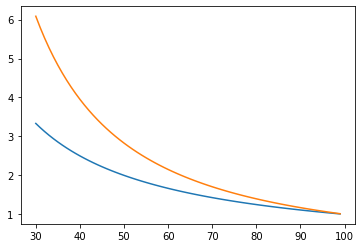

In [17]:
import matplotlib.pyplot as plt
x = range(30, 100)

for p in [1, 1.5]:
    y = [(100 / i) ** p for i in x]
    plt.plot(x, y)

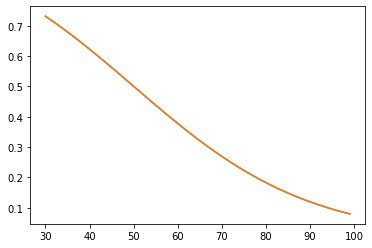

In [72]:
import matplotlib.pyplot as plt
import math
x = range(30, 100)

for p in [1, 1.5]:
    y = [1 / (1 + math.exp(-(50-i)/20)) for i in x]
    plt.plot(x, y)

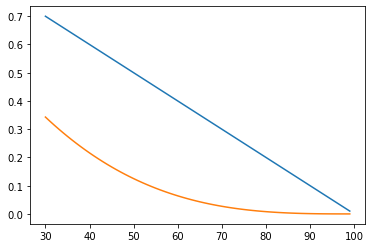

In [73]:
for p in [1, 3]:
    y = [(1 - i/100) ** p  for i in x]
    plt.plot(x, y)

In [81]:
p = 1.
a = (1 - 30/100) ** p
b = (1 - 90/100) ** p
print(a/b)

a = (1 - 30/100) ** p
b = (1 - 60/100) ** p
print(a/b)

7.000000000000001
1.7499999999999998


In [ ]:
ls